
# Project 3:  Advanced Lane Detection

**@ScottPenberthy**

Here we load our lanefinder code and choose a sample image.  We use MatPlotLib to visualize the data pipeline.

In [1]:
import lanefinder as lf
import matplotlib.pyplot as plt
%matplotlib inline

i4 = lf.ImageLoader("../CarND-Advanced-Lane-Lines/test_images/test3.jpg")
g = lf.Globals()
bot = lf.Lane(g)


**Pipeline Overview**

Let's walk through the pipeline in our algorithm. We store the diagnostic
images within a "diags" array.  We begin by resetting our bot, uh, lane
algorithm to an initial state. We feed it RGB images.  The first diagnostic
shows our raw frame.

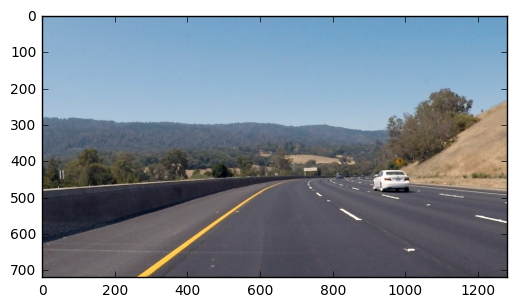

In [25]:
bot.reset()
out = bot.process_image(i4.rgb)

plt.imshow(bot.diags[0])

**Clahe Filter**

Our next step uses a clahe filter to enhance colors.

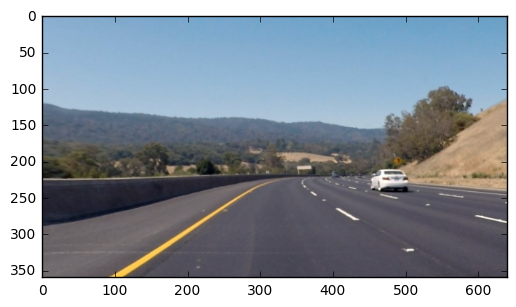

In [26]:
plt.imshow(bot.diags[1])

**Birds-eye View**

We now apply perspective projection to get a birds-eye view of our lane.

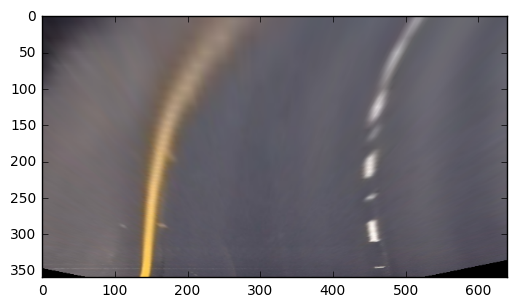

In [27]:
plt.imshow(bot.diags[2])

**Filter candidate pixels**

We apply sobel filters, color bandpass filters and a brightness filter
to identify candidate pixels.  This creates a black and white mask where
white highlights candidates.  We then create a histogram of mean intensity
in the vertical direction which we've overlayed here in red.
We see one hill on the left, for a left lane
marker.  We see a second hill on the right.

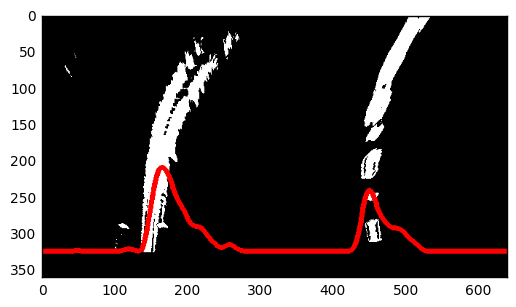

In [29]:
plt.imshow(bot.diags[3]*255)

**Histogram window**

We use the boundaries of our top histogram peaks on the left and right to
extract candidate pixels.

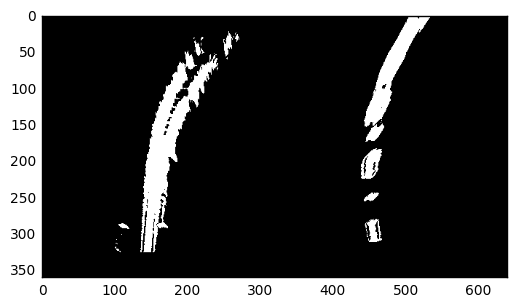

In [30]:
plt.imshow(bot.diags[4]*255)

**Visualizing the lane**

We make a first pass and fit a quadratic polynomial to the pixels on the left,
and another on the right.  We use this to draw a lane mask in black and
white.  They look pretty good!

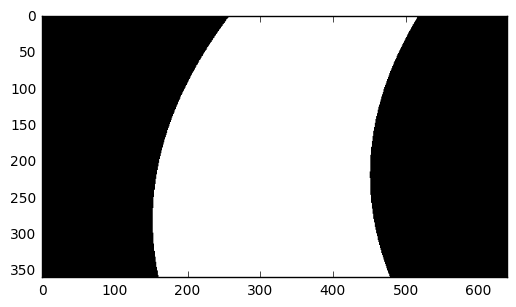

In [32]:
plt.imshow(bot.diags[5]*255)

Finally we project this lane onto our original image in semi-transparent green.  We note
that the left marker deviates a bit from the yellow.  This is due to clipping we've done
to remove potential shadows from the dashboard, allowing far better performance in
noisy conditions.

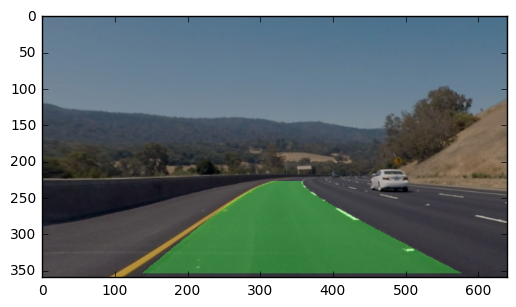

In [37]:
plt.imshow(bot.diags[6])

** Project video **

Here we run the output on our project video.

In [2]:
lf.do_project()

[MoviePy] >>>> Building video ./movies/new_project.mp4
[MoviePy] Writing video ./movies/new_project.mp4


100%|█████████▉| 1260/1261 [07:01<00:00,  3.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./movies/new_project.mp4 



Our video animates both the final output as well as the diagnostic pipeline through time.  The images shown are:

1.  The final overlay in the upper left

2.  Sobel filters applied to red, green and blue of the rgb image, to the right of our final overlay.

3. The Hue, Saturation an Brightness of the HSV colorspace, stacked on the right after the sobel filters.

4. The data pipeline across the bottom.

Your vision isn't blurry.

While driving I notice I often zone out, almost driving on
autopilot as the lanes whisk by.  I emulate this by blending the last 10 frames
using linear interpolation.  This blurs the lane markers so they "pop" more visually
for our algorithms to detect.  I chose to show these blurred images here to see how
they work on detecting lane lines.


In [5]:
%%HTML
<video width="640" height="360" controls>
  <source src="./movies/new_project.mp4" type="video/mp4">
</video>

**Finis**

I hope you enjoyed reviewing this!  This sure was a significant effort over several weeks.  This is probably because I'm learning the latest tool sets and computer vision techniques,
as opposed to pulling them from recent memory.  lol.

Scott

January, 2016